In [3]:
import os
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
#tables and columns 
inspector= inspect(engine)
inspector.get_table_names()



['measurement', 'station']

In [15]:
#tables and columns 
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [16]:
#display first 10 rows from measurement table 
engine.execute('select * from measurement limit 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [17]:
#find date 1 year ago
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [19]:
# date from last available data 
ly = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(ly)

2016-08-23


In [26]:
#queries for prior 12 months of data w/ print 
prior_12_prcp = (session .query(Measurement.prcp) .filter(Measurement.date > ly) .order_by(Measurement.date).all())
prior_12_date = (session .query(Measurement.date) .filter(Measurement.date > ly) .order_by(Measurement.date).all())
prior_12_comb = (session .query(Measurement.prcp, Measurement.date) .filter(Measurement.date >= ly) .order_by(Measurement.date).all())
for row in prior_12_prcp: print(row)

(0.08,)
(2.15,)
(2.28,)
(None,)
(1.22,)
(2.15,)
(1.45,)
(0.08,)
(0.08,)
(0.0,)
(0.0,)
(0.21,)
(0.06,)
(0.11,)
(0.0,)
(0.03,)
(0.02,)
(0.04,)
(0.0,)
(0.01,)
(0.0,)
(0.18,)
(0.02,)
(0.0,)
(0.12,)
(None,)
(0.01,)
(0.14,)
(0.14,)
(0.14,)
(0.6,)
(2.07,)
(0.0,)
(0.17,)
(0.04,)
(None,)
(0.0,)
(0.35,)
(0.9,)
(0.0,)
(0.0,)
(0.02,)
(0.0,)
(0.0,)
(0.05,)
(0.13,)
(0.1,)
(None,)
(None,)
(0.25,)
(0.24,)
(2.46,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(0.02,)
(0.01,)
(0.0,)
(0.02,)
(0.19,)
(None,)
(None,)
(0.01,)
(0.03,)
(0.0,)
(0.07,)
(0.08,)
(0.12,)
(1.0,)
(0.03,)
(0.03,)
(0.74,)
(0.14,)
(0.44,)
(None,)
(0.11,)
(None,)
(0.02,)
(0.03,)
(0.18,)
(None,)
(0.05,)
(0.04,)
(0.03,)
(0.11,)
(1.0,)
(0.05,)
(0.1,)
(0.23,)
(0.11,)
(0.16,)
(1.35,)
(0.0,)
(0.22,)
(0.01,)
(None,)
(0.01,)
(0.07,)
(0.15,)
(0.03,)
(0.01,)
(0.29,)
(None,)
(0.23,)
(0.16,)
(0.35,)
(0.0,)
(0.01,)
(0.14,)
(0.09,)
(1.16,)
(0.05,)
(0.18,)
(0.12,)
(0.3,)
(0.6,)
(0.0,)
(0.04,)
(None,)
(None,)
(0.15,)
(0.31,)
(1.04,)
(0.02,)
(0.37,)
(0.32,)
(None,)
(0.4

(None,)
(0.61,)
(0.84,)
(0.0,)
(0.03,)
(0.12,)
(0.0,)
(0.05,)
(0.11,)
(0.3,)
(0.0,)
(0.06,)
(0.02,)
(None,)
(0.0,)
(0.12,)
(0.3,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(0.0,)
(0.01,)
(0.0,)
(0.0,)
(0.13,)
(0.14,)
(0.01,)
(0.0,)
(0.09,)
(0.4,)
(0.0,)
(0.06,)
(0.02,)
(0.0,)
(0.23,)
(0.3,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.3,)
(0.0,)
(0.0,)
(None,)
(None,)
(0.0,)
(0.0,)
(0.0,)
(0.02,)
(0.12,)
(0.0,)
(None,)
(0.0,)
(0.05,)
(0.0,)
(0.25,)
(0.0,)
(0.01,)
(0.0,)
(0.06,)
(0.02,)
(0.04,)
(0.0,)
(0.0,)
(0.0,)
(0.06,)
(None,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(0.0,)
(0.0,)
(0.0,)
(0.05,)
(0.0,)
(0.1,)
(0.0,)
(0.34,)
(0.0,)
(0.0,)
(0.15,)
(0.0,)
(0.0,)
(0.0,)
(0.07,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(0.0,)
(0.0,)
(0.14,)
(0.0,)
(None,)
(0.0,)
(0.0,)
(None,)
(0.0,)
(0.01,)
(0.08,)
(0.0,)
(0.22,)
(0.02,)
(0.0,)
(0.06,)
(0.32,)
(0.42,)
(0.0,)
(0.07,)
(0.12,)
(0.42,)
(0.0,)
(0.05,)
(0.01,)
(0.13,)
(0.0,)
(0.0,)
(0.06,)
(None,)
(0.0,)
(0.0,)
(None,)
(0.09,)
(0.0,)
(0.01,)
(None,)
(0.0,)
(0.02,)
(None,)
(0.56,)
(0.0,

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


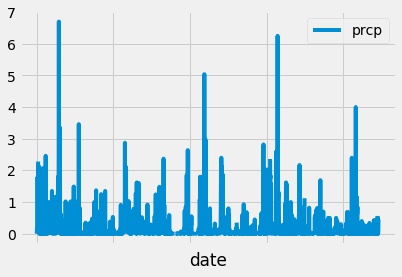

In [29]:
#Query results dataframe & plot
df = pd.DataFrame(prior_12_comb)
df.set_index(df['date'], inplace = True)
df.plot()
plt.show
df.describe()

In [43]:
# Design a query to show how many stations are available in this dataset?
#tables and columns 
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c['type'])
    
station_ct = (session .query(Station.station) .order_by(Station.station).count())
print(f'Number of stations in the set = {station_ct}')


Number of stations in the set = 9


In [48]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations = (session .query(func.count(Measurement.station), Measurement.station) .group_by(Measurement.station) .order_by(func.count(Measurement.station)))
for totals in stations:
    
    print(f'{totals} is among the most active stations')

(511, 'USC00518838') is among the most active stations
(1372, 'USC00517948') is among the most active stations
(1979, 'USC00511918') is among the most active stations
(2202, 'USC00514830') is among the most active stations
(2612, 'USC00516128') is among the most active stations
(2669, 'USC00519523') is among the most active stations
(2709, 'USC00513117') is among the most active stations
(2724, 'USC00519397') is among the most active stations
(2772, 'USC00519281') is among the most active stations


In [73]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_range = (session .query(func.min(Measurement.tobs),  func.max(Measurement.tobs), func.avg(Measurement.tobs), Measurement.station).filter(Measurement.station == 'USC00519281'))
for temps in temp_range:
    print(f'Here are minimum, average, and maximum temperatures for the most active station {temps}')
    




Here are minimum, average, and maximum temperatures for the most active station (54.0, 85.0, 71.66378066378067, 'USC00519281')


In [74]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histograph
active = (session .query(Measurement.tobs, Measurement.date)
                  .filter(Measurement.date >= ly)
                  .filter(Measurement.station == 'USC00519281'))

for result in active:
    print(result)


(77.0, '2016-08-23')
(77.0, '2016-08-24')
(80.0, '2016-08-25')
(80.0, '2016-08-26')
(75.0, '2016-08-27')
(73.0, '2016-08-28')
(78.0, '2016-08-29')
(77.0, '2016-08-30')
(78.0, '2016-08-31')
(80.0, '2016-09-01')
(80.0, '2016-09-02')
(78.0, '2016-09-03')
(78.0, '2016-09-04')
(78.0, '2016-09-05')
(73.0, '2016-09-06')
(74.0, '2016-09-07')
(80.0, '2016-09-08')
(79.0, '2016-09-09')
(77.0, '2016-09-10')
(80.0, '2016-09-11')
(76.0, '2016-09-12')
(79.0, '2016-09-13')
(75.0, '2016-09-14')
(79.0, '2016-09-15')
(78.0, '2016-09-16')
(79.0, '2016-09-17')
(78.0, '2016-09-18')
(78.0, '2016-09-19')
(76.0, '2016-09-20')
(74.0, '2016-09-21')
(77.0, '2016-09-22')
(78.0, '2016-09-23')
(79.0, '2016-09-24')
(79.0, '2016-09-25')
(77.0, '2016-09-26')
(80.0, '2016-09-27')
(78.0, '2016-09-28')
(78.0, '2016-09-29')
(78.0, '2016-09-30')
(77.0, '2016-10-01')
(79.0, '2016-10-02')
(79.0, '2016-10-03')
(79.0, '2016-10-04')
(79.0, '2016-10-05')
(75.0, '2016-10-06')
(76.0, '2016-10-07')
(73.0, '2016-10-08')
(72.0, '2016-

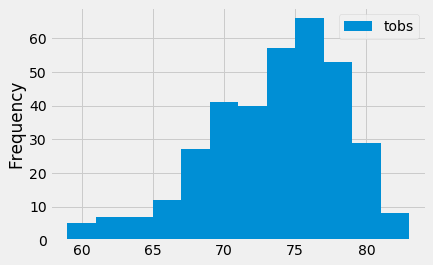

In [85]:
#top station histograph 
active_df = pd.read_sql(active.statement, active.session.bind)
active_df
active_df.plot.hist(bins=12, label='tobs')
plt.legend(loc='upper right')
plt.show()

In [86]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [92]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = '2018-01-01'
end_date = '2018-01-10'
tripstart = dt.datetime.strptime(start_date, '%Y-%m-%d') - dt.timedelta(days=365)
tripend = dt.datetime.strptime(end_date, '%Y-%m-%d') - dt.timedelta(days=365)
historical_temps = calc_temps(tripstart, tripend)
print(f'the historical temperatures during my trip dates are {historical_temps}')



the historical temperatures during my trip dates are [(60.0, 67.89090909090909, 77.0)]


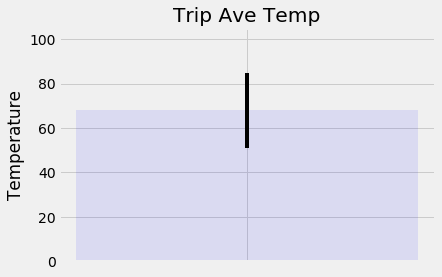

In [97]:
# Plot the results from your previous query as a bar chart. 
tmin = 60.0
tave = 67.89
tmax = 77.0
plt.bar('', tave, yerr=tmax-tmin, color='blue', alpha=.09, width=.05)
plt.ylim(0, 105)
plt.title('Trip Ave Temp')
plt.ylabel('Temperature')
plt.show()